Nama : Asyifa Izayani Safari 

NIM : 1206230016 

DS-03-01

# Import Dataset and Libraries 

In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import curve_fit


In [42]:
df = pd.read_csv("/Users/asyzyni/Documents/COLLEGE👩🏻‍🏫/2. IPSD/DataCO2.csv")
df

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


# Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [44]:
df.isnull().sum()

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [45]:
df.duplicated().sum()

0

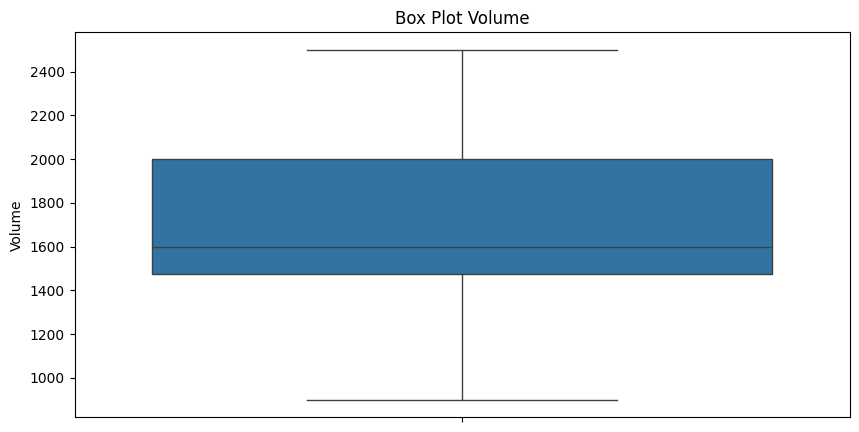

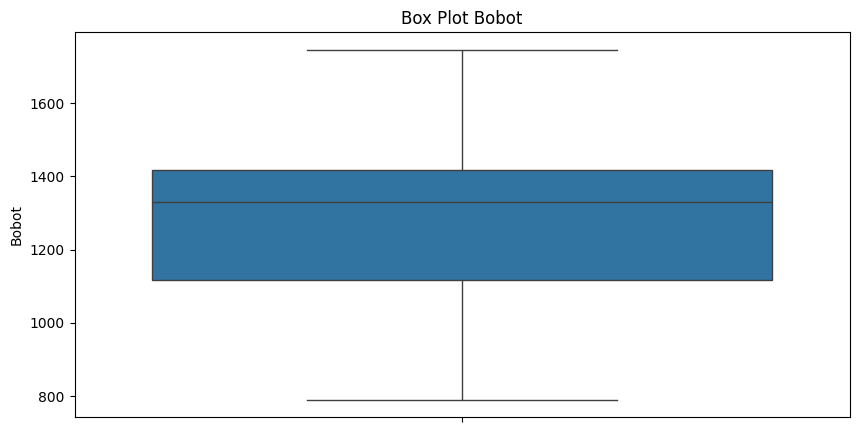

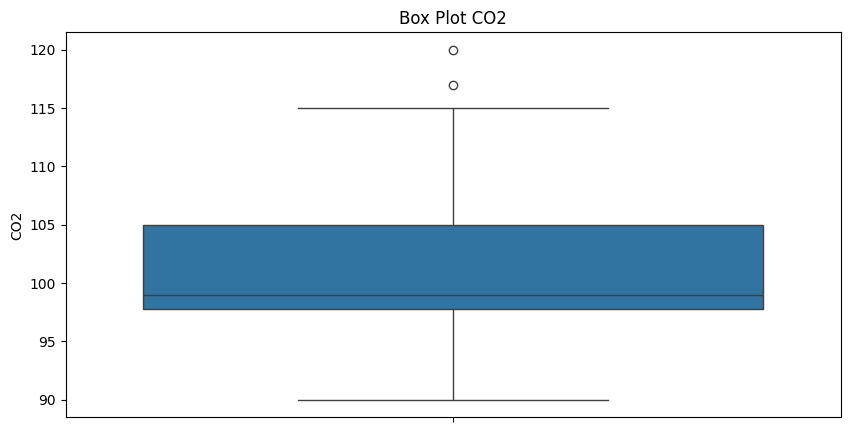

In [46]:
for i in ['Volume',	'Bobot',	'CO2']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[i])
    plt.title(f'Box Plot {i}')
    plt.show()

## handling outlier

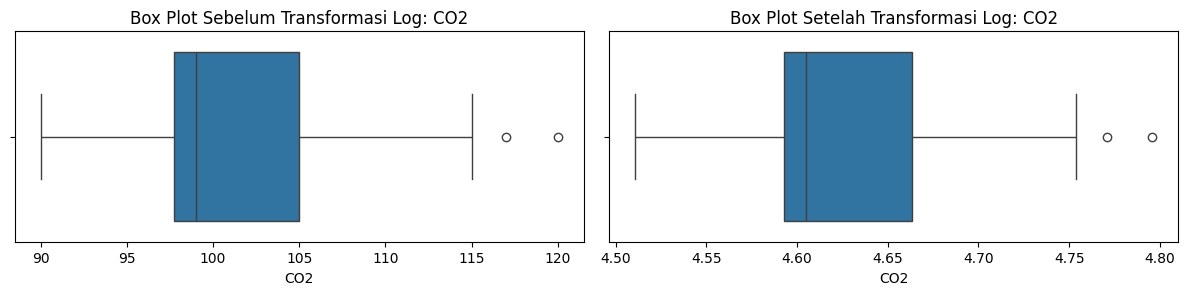

In [47]:
# Daftar fitur yang ingin ditransformasikan
fitur_outlier = ['CO2']

# Membuat box plot sebelum dan sesudah transformasi log
plt.figure(figsize=(12, 8))

for i, fitur in enumerate(fitur_outlier):
    # Box plot sebelum transformasi log
    plt.subplot(3, 2, 2*i + 1)
    sns.boxplot(x=df[fitur])
    plt.title(f'Box Plot Sebelum Transformasi Log: {fitur}')

    # Terapkan transformasi log langsung ke kolom yang ada
    df[fitur] = np.log1p(df[fitur])

    # Box plot setelah transformasi log
    plt.subplot(3, 2, 2*i + 2)
    sns.boxplot(x=df[fitur])
    plt.title(f'Box Plot Setelah Transformasi Log: {fitur}')

plt.tight_layout()
plt.show()

In [48]:
df

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,4.605170
1,Mitsubishi,Space Star,1200,1160,4.564348
2,Skoda,Citigo,1000,929,4.564348
3,Fiat,500,900,865,4.510860
4,Mini,Cooper,1500,1140,4.663439
5,VW,Up!,1000,929,4.663439
6,Skoda,Fabia,1400,1109,4.510860
7,Mercedes,A-Class,1500,1365,4.532599
8,Ford,Fiesta,1500,1112,4.595120
9,Audi,A1,1600,1150,4.605170


# EDA 

In [50]:
df.describe()

,Volume,Bobot,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,4.632513
std,388.975047,242.123889,0.071123
min,900.000000,790.000000,4.510860
25%,1475.000000,1117.250000,4.592582
50%,1600.000000,1329.000000,4.605170
75%,2000.000000,1418.250000,4.663439
max,2500.000000,1746.000000,4.795791


## distribusi per kolom

### top 3 merk and model

Text(0.5, 1.0, 'top 3 model mobil')

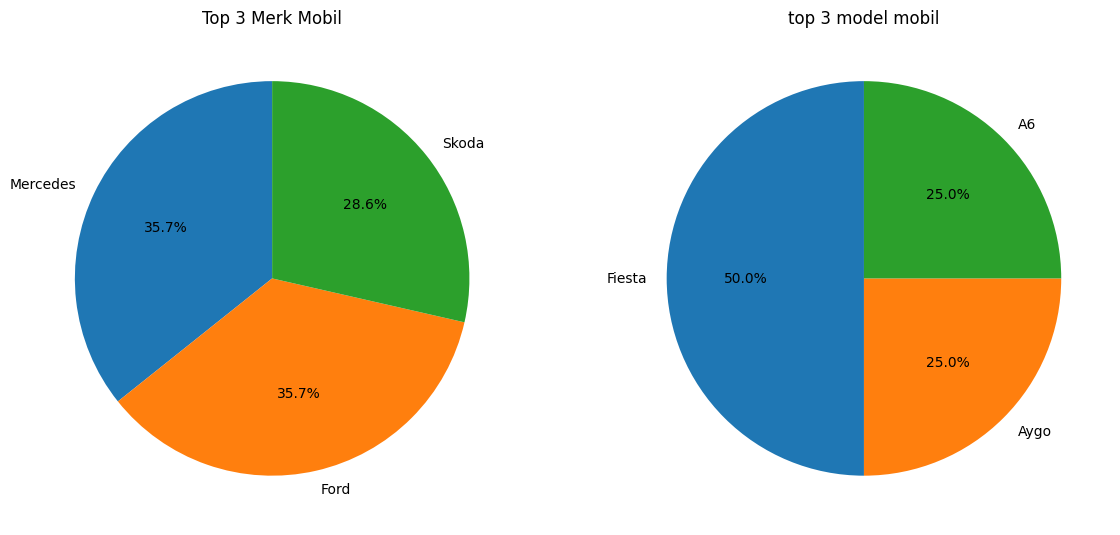

In [57]:
top_nama = df['Nama'].value_counts().nlargest(3)
top_model = df['Model'].value_counts().nlargest(3)

plt.figure(figsize=(14,7))

# buat pie chart merk mobil
plt.subplot(1,2,1)
plt.pie(top_nama, labels=top_nama.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Merk Mobil')

# buat pie chart untuk model mobil 
plt.subplot(1,2,2)
plt.pie(top_model, labels=top_model.index, autopct='%1.1f%%', startangle=90)
plt.title("top 3 model mobil")

### volume

/var/folders/v6/s7jbz6sn6qv9dh421jb6jbsm0000gn/T/ipykernel_7138/1777472287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Volume', data=df, palette='viridis')


<Axes: xlabel='Volume', ylabel='count'>

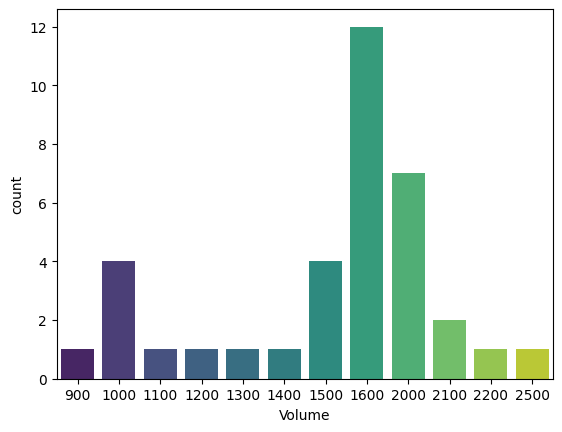

In [58]:
sns.countplot(x='Volume', data=df, palette='viridis')


### matriks korelasi

<Axes: >

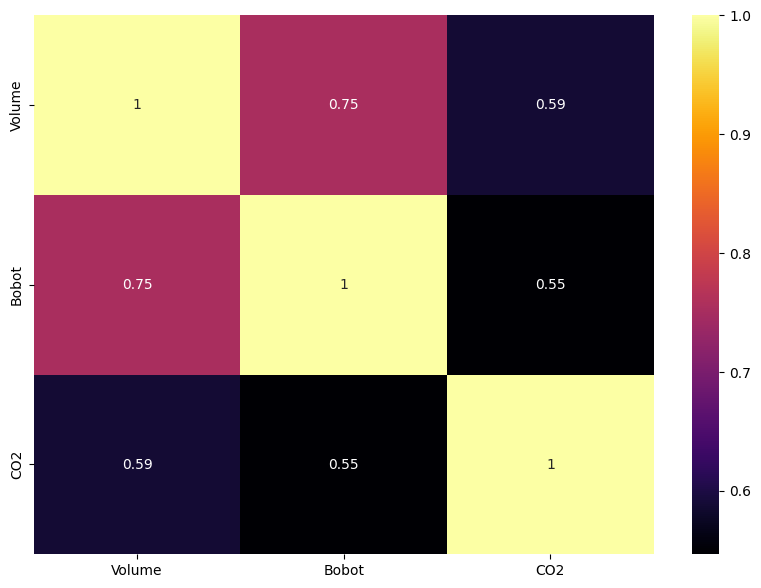

In [59]:
plt.figure(figsize=(10,7))

df_numb = df.select_dtypes(include=['number'])
sns.heatmap(df_numb.corr(), annot=True, cmap='inferno')


# Modeling

In [64]:
x = df_numb[['Volume', 'Bobot']] #fitur

y = df_numb['CO2'] # fitur

In [65]:
print(x.shape)
print(y.shape)

(36, 2)
(36,)


In [66]:
# bagi dataset 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [67]:
# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model.predict(X_test)

In [68]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 0.004758685564104886
RMSE: 0.0689832266866728
MAE: 0.05820703487453749
R-squared: 0.3576304171095571


# Pertanyaan 

Apakah ada tipe data non numerik pada DataCO2.csv? Dan apakah ada yang bersifat
nominal/ordinal? Jika ada sebutkan kolom mana saja, jika tidak jelaskan mengapa

jawab : ada,yaitu model dan nama. nama dan model adalah tipe data yang nominal 